# 1. Perkenalan

* nama  : Iqbal Awis Nurdiansyah
* batch : RMT - 019


Objective : Mendapatkan cluster bagi pada pengguna layanan 

# 2. Querry

SELECT * FROM `ftds-hacktiv8-project.phase1_ftds_019_rmt.credit-card-information`
WHERE MOD(CUST_ID,2) != 0

# 3. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

#model
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

#evaluation
from sklearn.metrics.pairwise import cosine_similarity

#Saving
import joblib
import pickle
import json



# 4. Data Loading

In [2]:
df = pd.read_csv('h8dsft_P1G4_iqbal.csv')

In [3]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125000,45.00,45.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,500.0,0.000000,NaN,0.000000,8
1,5069,0.000000,0.000000,176.03,176.03,0.00,0.0,0.125,0.125,0.00,0.0,0,1,7000.0,0.000000,NaN,0.000000,8
2,6075,757.964752,0.875000,157.40,157.40,0.00,0.0,0.125,0.125,0.00,0.0,0,6,1200.0,1494.480376,2638.598410,0.000000,8
3,6291,264.566591,0.375000,1150.00,1150.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1200.0,3029.380326,85.428885,0.000000,8
4,7755,440.613643,1.000000,600.00,600.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1000.0,215.316424,137.846006,0.000000,8
5,8299,611.561026,1.000000,765.00,765.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,2000.0,204.464151,146.352314,0.000000,8
6,8629,0.228572,0.125000,60.00,60.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1500.0,438.738982,NaN,0.000000,8
7,8805,105.333584,0.375000,306.00,306.00,0.00,0.0,0.125,0.125,0.00,0.0,0,2,6000.0,101.986927,118.324082,0.000000,8
8,7,16.379412,0.454545,178.15,0.00,178.15,0.0,0.250,0.000,0.25,0.0,0,3,5000.0,229.376368,89.613822,0.181818,12
9,91,559.151424,1.000000,94.00,94.00,0.00,0.0,0.250,0.250,0.00,0.0,0,3,5500.0,254.733329,218.279194,0.000000,12


In [4]:
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,6809,4438.521324,1.000000,591.84,109.16,482.68,564.365429,0.636364,0.181818,0.454545,0.272727,3,11,17000.0,5552.601399,1094.486286,0.00,11
4466,7211,1135.703750,1.000000,92.07,0.00,92.07,81.509491,0.272727,0.000000,0.181818,0.272727,3,3,1200.0,355.798199,434.689529,0.00,11
4467,8295,185.984965,0.454545,482.24,392.24,90.00,903.843591,0.272727,0.181818,0.090909,0.272727,8,8,1200.0,2333.997439,160.900585,0.25,11
4468,8855,3531.167073,0.900000,797.50,577.83,219.67,5273.226918,0.700000,0.400000,0.500000,0.900000,33,21,4000.0,2979.546700,3052.080103,0.00,10
4469,2389,1917.895730,1.000000,285.07,285.07,0.00,6084.858872,0.363636,0.363636,0.000000,1.090909,28,6,3000.0,5692.682993,556.449635,0.00,11
4470,2345,9629.808851,1.000000,0.00,0.00,0.00,4372.393835,0.000000,0.000000,0.000000,0.545455,9,0,12000.0,2468.988022,2134.295731,0.00,11
4471,6785,1040.030221,1.000000,0.00,0.00,0.00,1390.648290,0.000000,0.000000,0.000000,0.545455,18,0,1400.0,290.129620,287.994171,0.00,11
4472,7347,1322.818587,1.000000,0.00,0.00,0.00,762.301096,0.000000,0.000000,0.000000,0.545455,11,0,1500.0,1035.627320,312.835530,0.00,11
4473,8447,1060.391273,1.000000,0.00,0.00,0.00,1475.858013,0.000000,0.000000,0.000000,0.545455,10,0,2000.0,407.360560,277.084736,0.00,11
4474,1995,3447.674222,1.000000,205.00,205.00,0.00,4548.057776,0.090909,0.090909,0.000000,0.545455,7,1,10500.0,665.239171,817.844662,0.00,11


In [5]:
df.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4320.000000,4475.000000,4475.000000
mean,4475.000000,1563.205717,0.876933,1003.251343,596.369893,407.110215,984.288554,0.490579,0.202301,0.363886,0.136132,3.301229,14.929162,4494.878630,1740.075430,873.976757,0.150224,11.518212
std,2583.931114,2072.045789,0.238222,2060.034730,1653.425984,880.799744,2060.448056,0.402907,0.298203,0.397603,0.201036,7.134727,25.540814,3609.267706,2827.633858,2436.877272,0.289081,1.328925
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,2238.000000,124.432849,0.888889,39.560000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,376.913051,168.590144,0.000000,12.000000
50%,4475.000000,871.355430,1.000000,360.000000,45.650000,88.620000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,877.494612,313.980229,0.000000,12.000000
75%,6712.000000,2047.570799,1.000000,1102.420000,575.220000,455.885000,1138.887754,0.916667,0.250000,0.750000,0.250000,4.000000,17.000000,6500.000000,1911.596530,819.371080,0.125000,12.000000
max,8949.000000,18495.558550,1.000000,41050.400000,40624.060000,14686.100000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,347.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [7]:
#cek duplikasi data
df.duplicated(keep=False).sum()

0

# 5. EDA

In [55]:
total_credit_limit = df['CREDIT_LIMIT'].sum()
print('jumlah limit yang harus ditanggung perusahaan sebesar : ' , total_credit_limit)

jumlah limit yang harus ditanggung perusahaan sebesar :  20114581.868687


In [57]:
max_balance = df['BALANCE'].max()
print('BALANCE terbanyak yang dimiliki customer sebanyak :' , max_balance)

BALANCE terbanyak yang dimiliki customer sebanyak : 18495.55855


# 6. Feature Engineering

In [9]:
# copy dataset asli
data=df.copy()

## Missing Value 

In [10]:
#cek missing value 
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
#mencari mean pada pada kolom missing value 
median_value = data['MINIMUM_PAYMENTS'].median()

In [12]:
# mengisi missing value menggunakan mean
data['MINIMUM_PAYMENTS'].fillna(median_value, inplace=True)

In [13]:
#cek missing value 
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [14]:
data.drop('CUST_ID' ,inplace=True, axis=1)

In [15]:
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,313.980229,0.0,8
1,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,313.980229,0.0,8
2,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8
4,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11


## Handling Outlier

In [16]:
# fungsi untuk Cek distribusi data
def diagnostic_plots(data, variable1, variable2, variable3, variable4):
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable1], bins=20)
    plt.title('Histogram of ' + variable1)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data[variable1])
    plt.title('Boxplot of ' + variable1)
    
    print('Skewness Value of', variable1,':', data[variable1].skew() )
    
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable2], bins=20)
    plt.title('Histogram of ' + variable2)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data[variable2])
    plt.title('Boxplot of ' + variable2)
    
    print('Skewness Value of', variable2,':', data[variable2].skew() )
    
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable3], bins=20)
    plt.title('Histogram of ' + variable3)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data[variable3])
    plt.title('Boxplot of ' + variable3)

    print('Skewness Value of', variable3,':', data[variable3].skew() )

    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable4], bins=20)
    plt.title('Histogram of ' + variable4)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data[variable4])
    plt.title('Boxplot of ' + variable4)    
    
    print('Skewness Value of', variable4,':', data[variable4].skew() )

    plt.figure(figsize=(18, 4))
    
    plt.show()

Skewness Value of BALANCE : 2.3290088807150915
Skewness Value of BALANCE_FREQUENCY : -2.026529776439142
Skewness Value of PURCHASES : 7.071705718331177
Skewness Value of ONEOFF_PURCHASES : 9.951056583113456


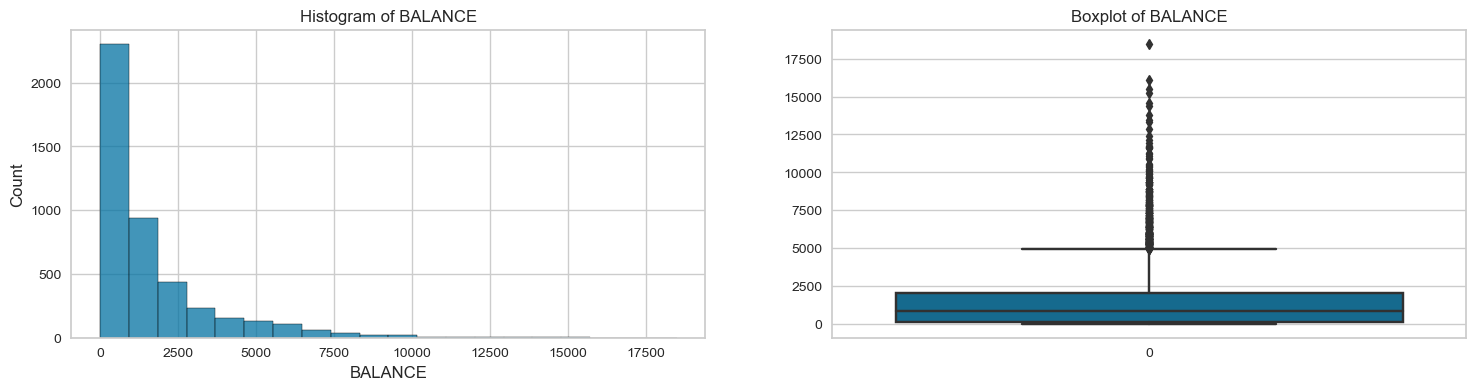

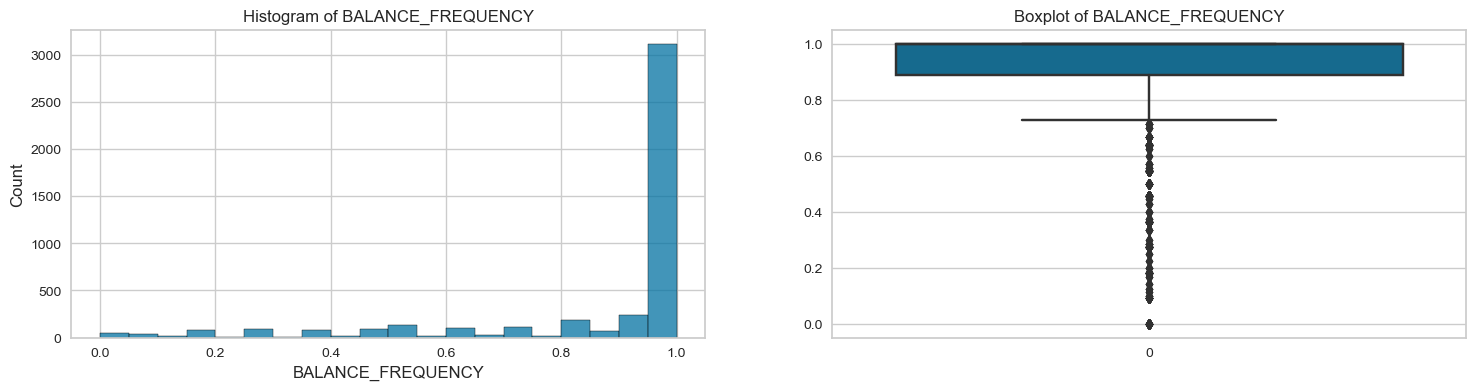

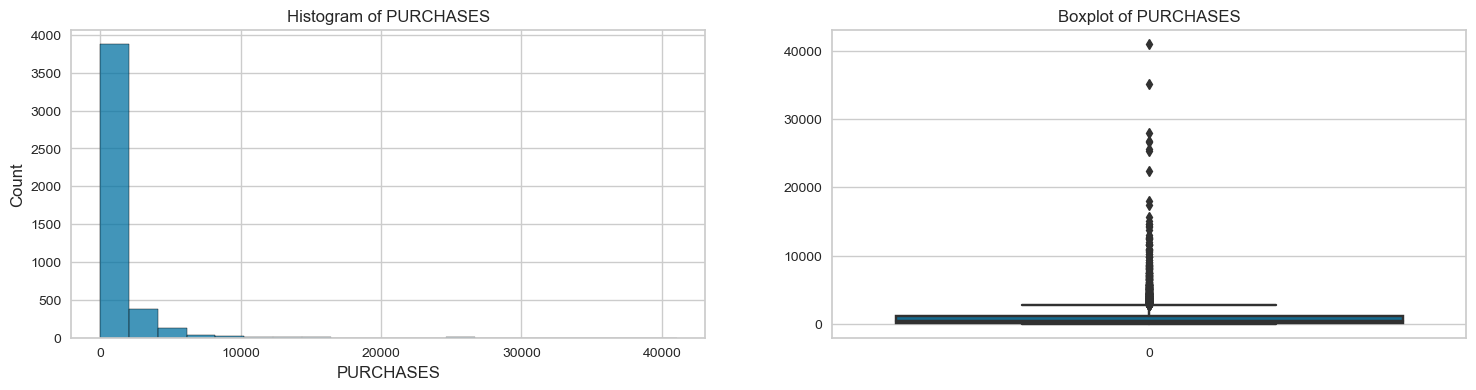

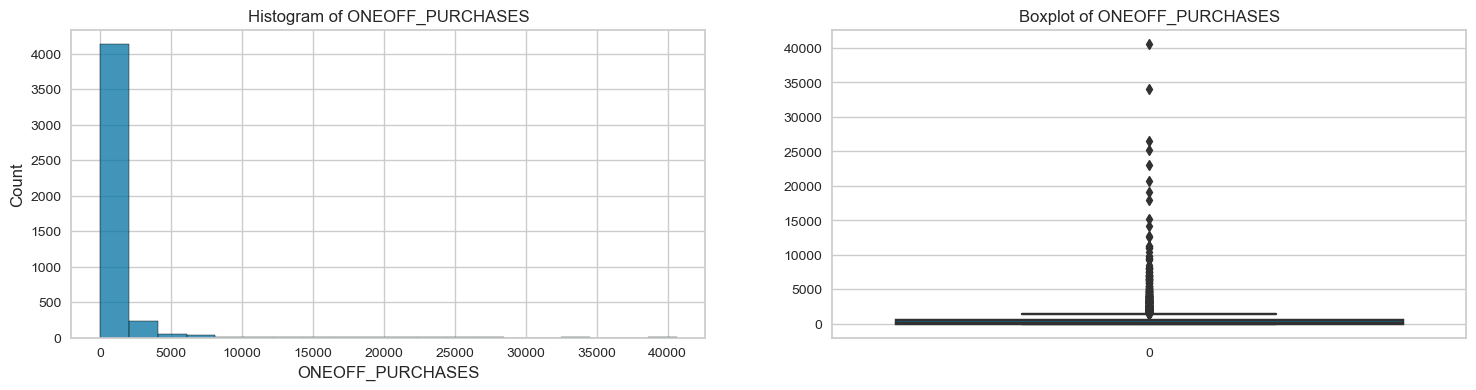

<Figure size 1800x400 with 0 Axes>

In [17]:
diagnostic_plots(data,'BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES')

Skewness Value of INSTALLMENTS_PURCHASES : 6.330629906494809
Skewness Value of CASH_ADVANCE : 5.638109294257693
Skewness Value of PURCHASES_FREQUENCY : 0.05875497991848613
Skewness Value of ONEOFF_PURCHASES_FREQUENCY : 1.5483193819148602


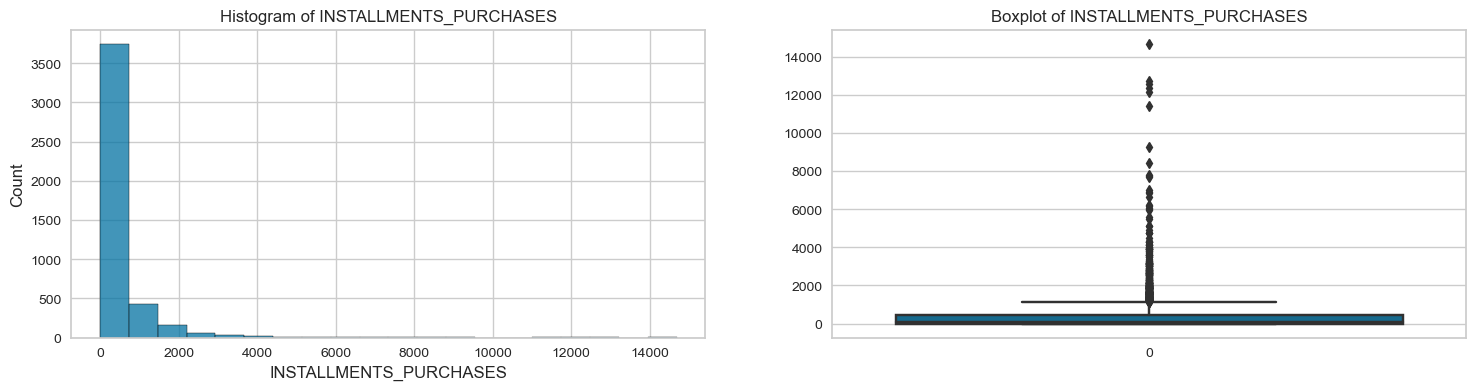

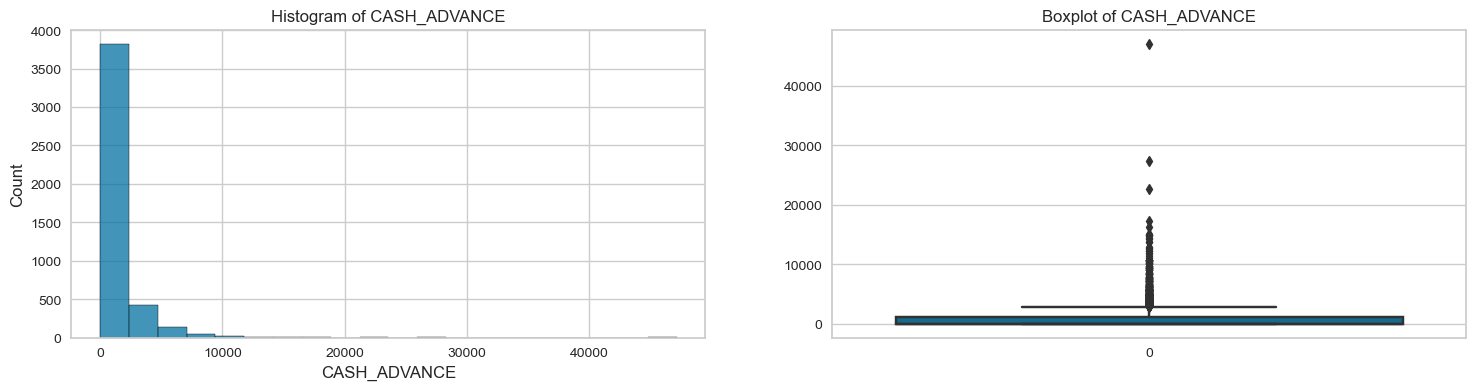

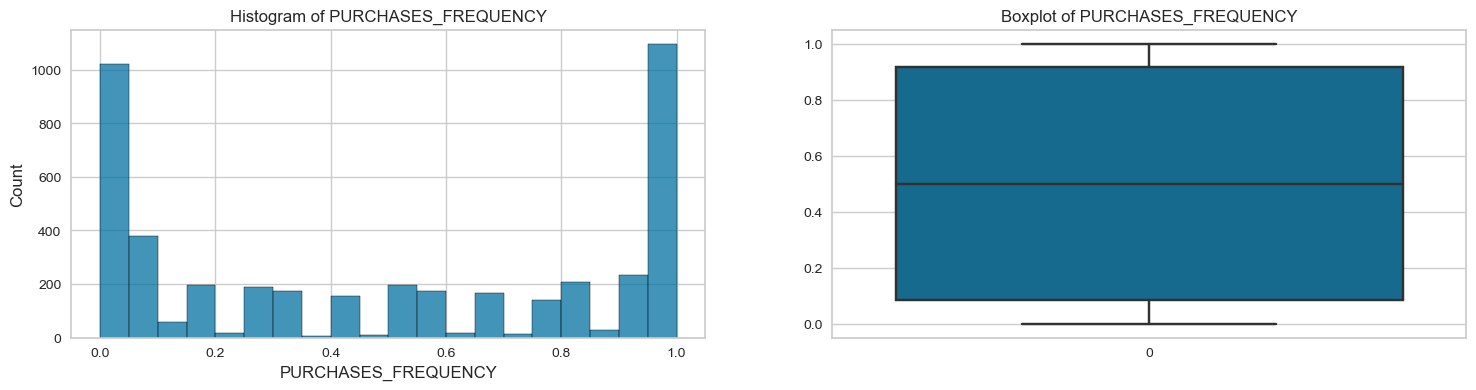

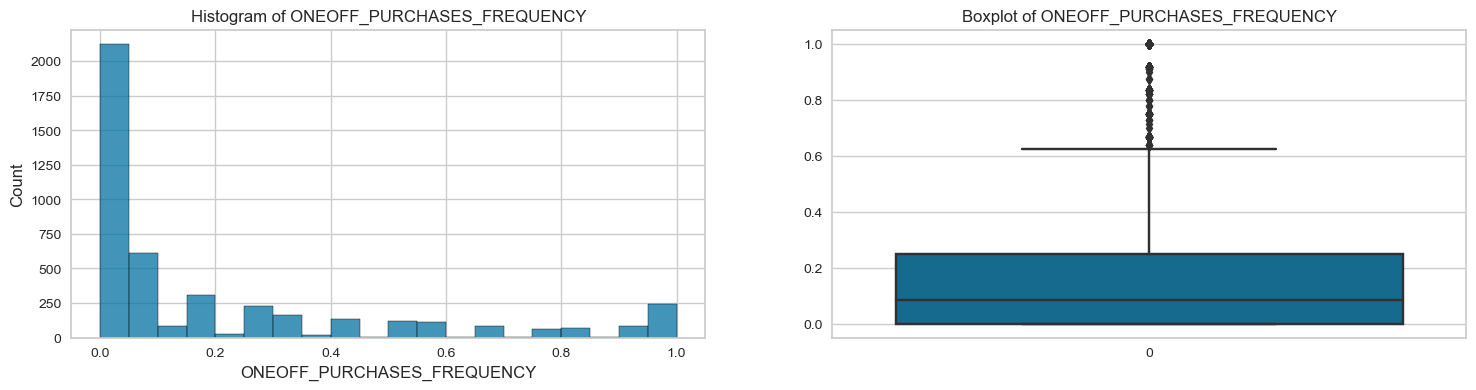

<Figure size 1800x400 with 0 Axes>

In [18]:
diagnostic_plots(data,'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY')

Skewness Value of PURCHASES_INSTALLMENTS_FREQUENCY : 0.5082957786202944
Skewness Value of CASH_ADVANCE_FREQUENCY : 1.8342106501962343
Skewness Value of CASH_ADVANCE_TRX : 6.420103784668197
Skewness Value of PURCHASES_TRX : 4.747507133980154


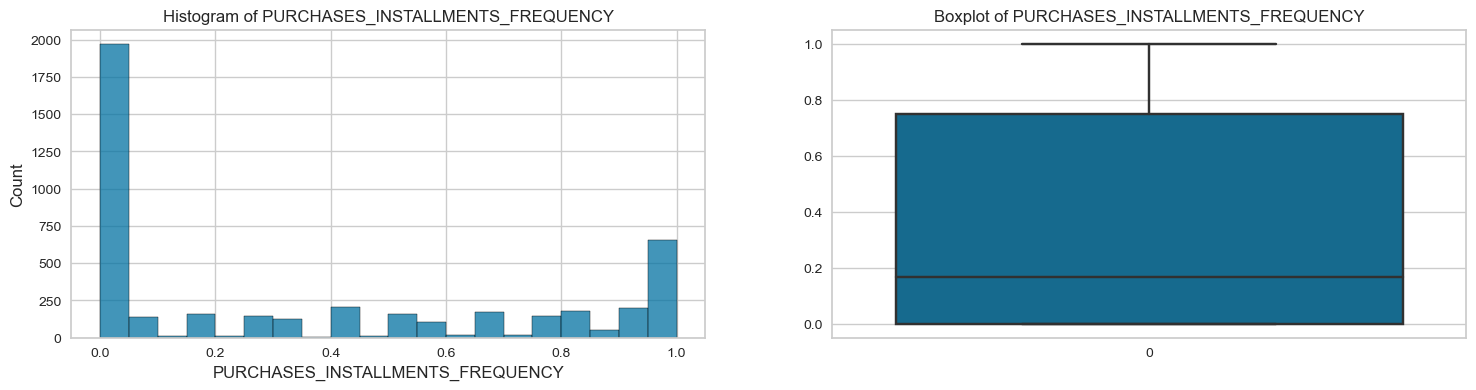

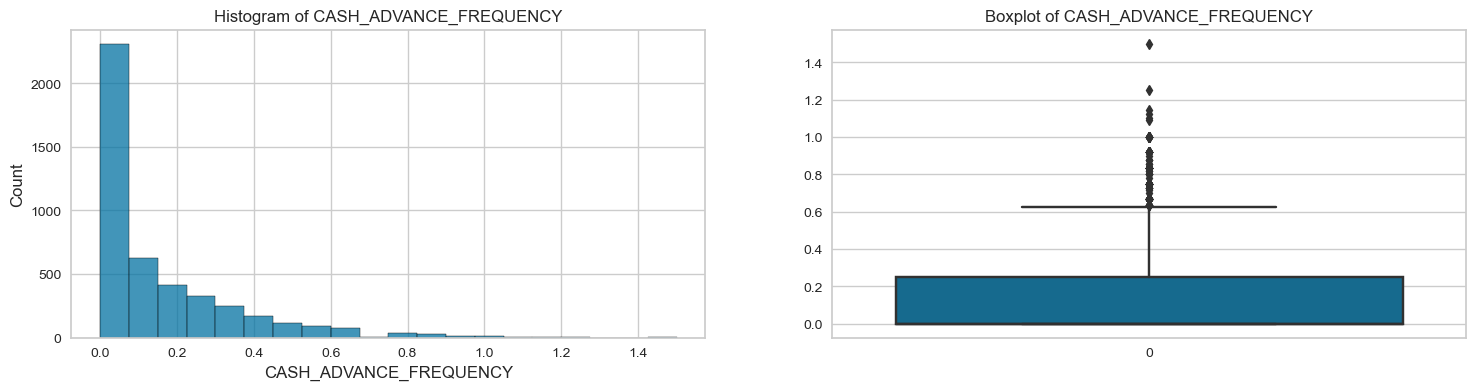

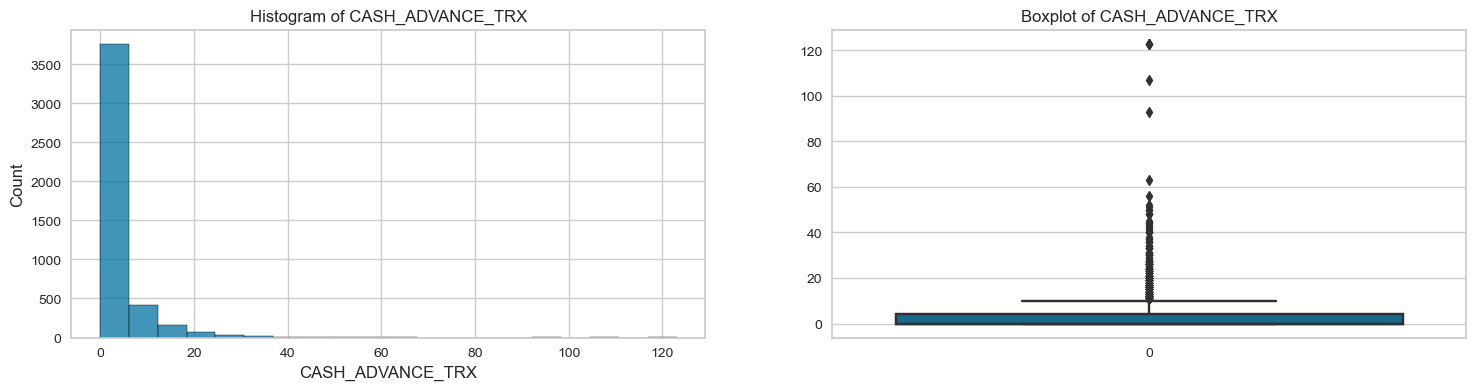

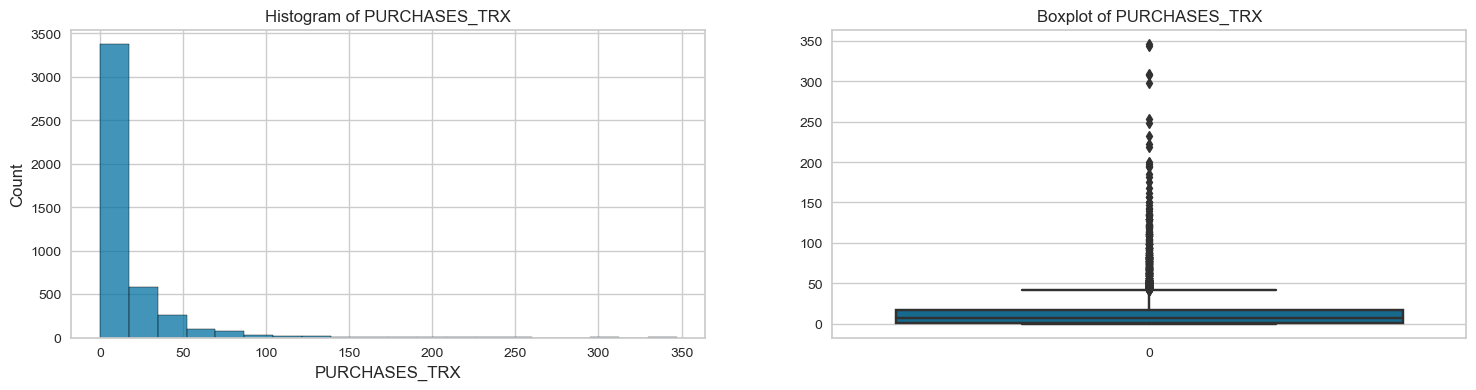

<Figure size 1800x400 with 0 Axes>

In [19]:
diagnostic_plots(data,'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX')

Skewness Value of CREDIT_LIMIT : 1.498947716941148
Skewness Value of PAYMENTS : 5.747503259811283
Skewness Value of MINIMUM_PAYMENTS : 14.913415253196789
Skewness Value of PRC_FULL_PAYMENT : 1.9752382754788178


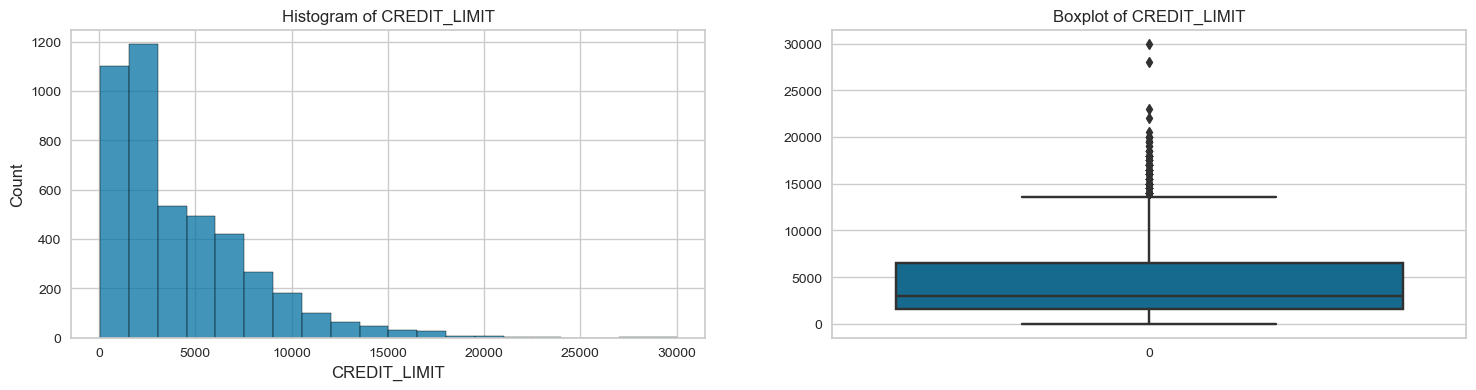

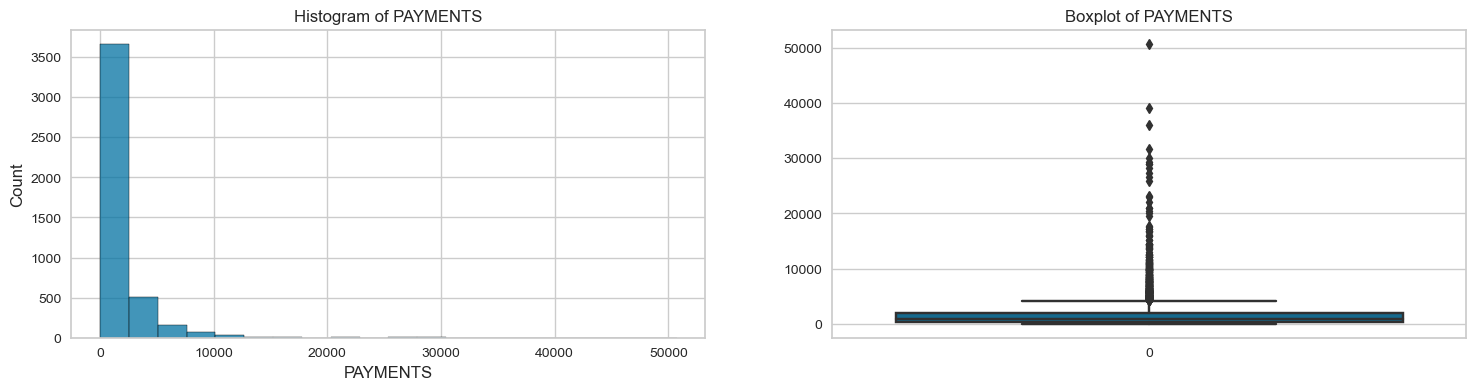

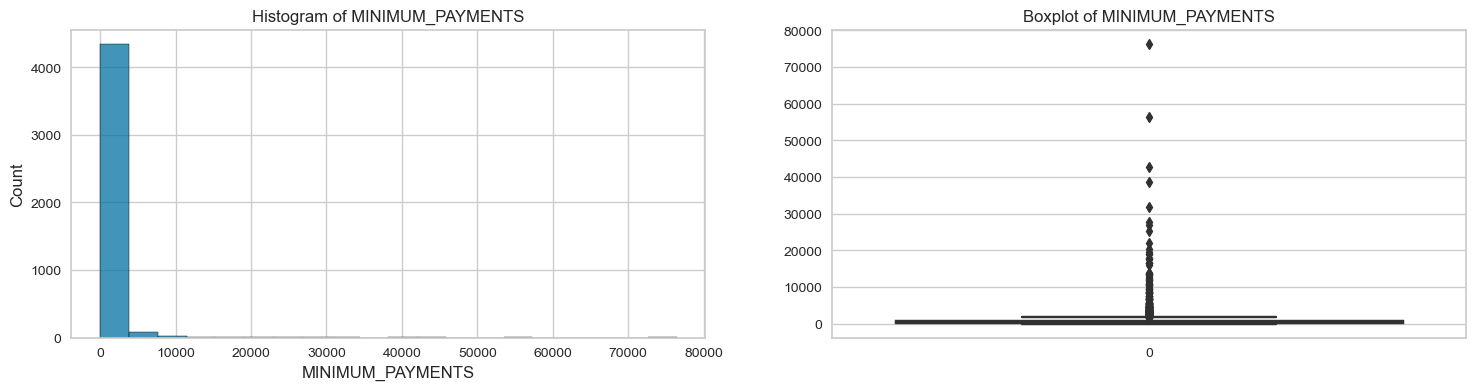

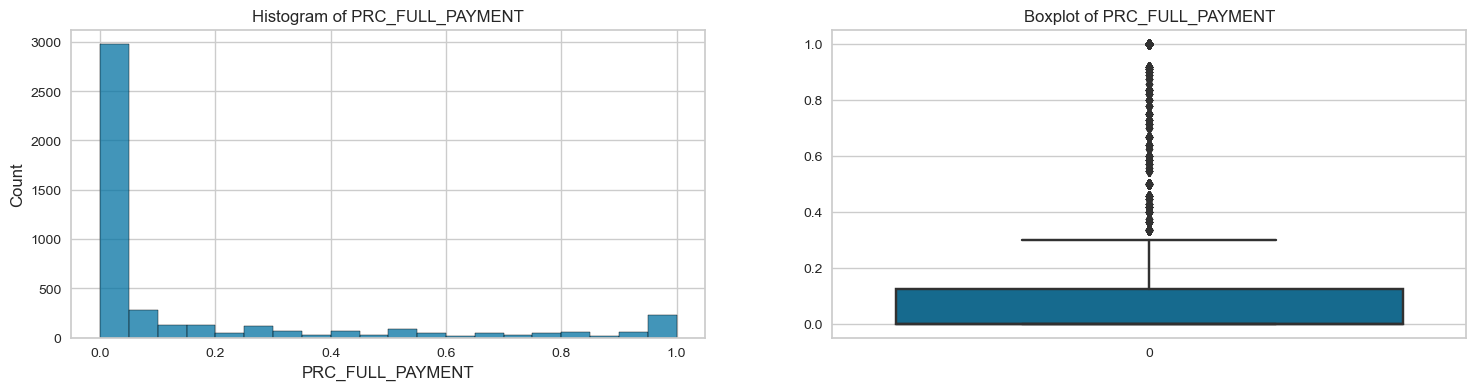

<Figure size 1800x400 with 0 Axes>

In [20]:
diagnostic_plots(data, 'CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT')

In [21]:
def diagnostic_plots1(df, v,):
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[v], bins=20)
    plt.title('Histogram of ' + v)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[v])
    plt.title('Boxplot of ' + v)
    
    print('Skewness Value of', v,':', df[v].skew() )

Skewness Value of TENURE : -2.954158581529189


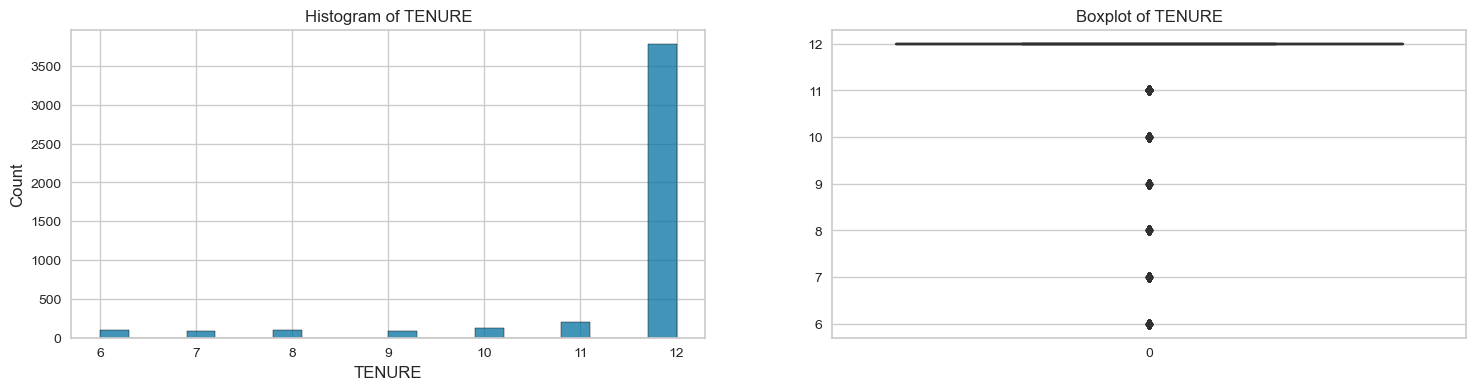

In [22]:
diagnostic_plots1(data,'TENURE')

In [23]:
winsoriser= Winsorizer(capping_method='iqr',
             tail='both',
             fold=1.5,
             variables=['BALANCE' , 'BALANCE_FREQUENCY' ,	'PURCHASES' ,'ONEOFF_PURCHASES',	
                        'INSTALLMENTS_PURCHASES' ,'CASH_ADVANCE',
                        'PURCHASES_FREQUENCY' ,'ONEOFF_PURCHASES_FREQUENCY'	, 'PURCHASES_INSTALLMENTS_FREQUENCY',
                        'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS',
                        'MINIMUM_PAYMENTS','PRC_FULL_PAYMENT'])
winsoriser.fit(data)
data = winsoriser.transform(data)

## Scaling

In [24]:
scaler = MinMaxScaler()

In [25]:
scaler.fit(data)

data_sc=scaler.transform(data)

In [26]:
data_sc=pd.DataFrame(data_sc, columns=data.columns.tolist())

In [27]:
data_sc

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.000777,0.00,0.016687,0.031292,0.0,0.000000,0.125000,0.200000,0.0,0.000000,0.0,0.024390,0.032609,0.000000,0.183691,0.0,0.333333
1,0.000000,0.00,0.065276,0.122409,0.0,0.000000,0.125000,0.200000,0.0,0.000000,0.0,0.024390,0.503623,0.000000,0.183691,0.0,0.333333
2,0.153674,0.55,0.058367,0.109454,0.0,0.000000,0.125000,0.200000,0.0,0.000000,0.0,0.146341,0.083333,0.354678,1.000000,0.0,0.333333
3,0.053640,0.00,0.426446,0.799694,0.0,0.000000,0.125000,0.200000,0.0,0.000000,0.0,0.024390,0.083333,0.718949,0.049971,0.0,0.333333
4,0.089333,1.00,0.222493,0.417232,0.0,0.000000,0.125000,0.200000,0.0,0.000000,0.0,0.024390,0.068841,0.051100,0.080639,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,1.000000,1.00,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.872728,0.9,0.000000,0.865942,0.585954,1.000000,0.0,0.833333
4471,0.210862,1.00,0.000000,0.000000,0.0,0.488423,0.000000,0.000000,0.0,0.872728,1.0,0.000000,0.097826,0.068855,0.168487,0.0,0.833333
4472,0.268196,1.00,0.000000,0.000000,0.0,0.267735,0.000000,0.000000,0.0,0.872728,1.0,0.000000,0.105072,0.245781,0.183022,0.0,0.833333
4473,0.214990,1.00,0.000000,0.000000,0.0,0.518351,0.000000,0.000000,0.0,0.872728,1.0,0.000000,0.141304,0.096677,0.162105,0.0,0.833333


## VIF

In [28]:
# FUngsi menghitung nilai VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = data_sc.columns
    vif["VIF"] = [variance_inflation_factor(data_sc.values, i) for i in range(data_sc.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

In [29]:
calc_vif(data_sc)

,variables,VIF
2,PURCHASES,28.104056
6,PURCHASES_FREQUENCY,25.515870
8,PURCHASES_INSTALLMENTS_FREQUENCY,22.076968
3,ONEOFF_PURCHASES,16.349970
10,CASH_ADVANCE_TRX,12.896958
9,CASH_ADVANCE_FREQUENCY,11.596217
11,PURCHASES_TRX,11.517895
4,INSTALLMENTS_PURCHASES,11.474191
0,BALANCE,10.595486
7,ONEOFF_PURCHASES_FREQUENCY,10.218877


dari 17 kolom terdapat 3 kolom yang memiliki nilai `VIF` < 5 jadi bisa kita prediknya kita akan reduksi dari 17 kolom menjadi 14 kolom

In [30]:
data_clean=data_sc.copy()

# 7. Model Definition

Model `K-means` dengan metode `Elbow` dan `Silhouette`

# 8. Model Training

In [31]:
data_clean.shape

(4475, 17)

In [32]:
pca=PCA()

In [33]:
pca.fit(data_clean)
cm  = np.cumsum(pca.explained_variance_ratio_)
red = np.argmax(cm >= 0.95) + 1
red

10

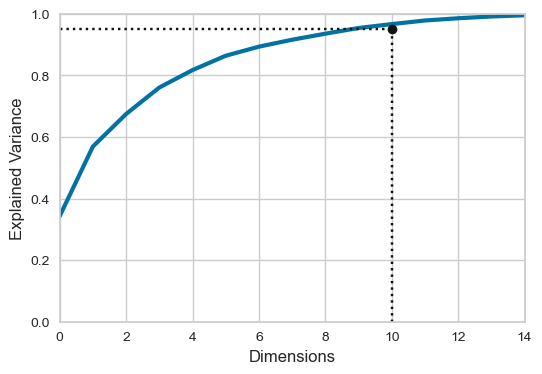

In [34]:
plt.figure(figsize=(6,4))
plt.plot(cm, linewidth=3)
plt.axis([0, 14, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([red, red], [0, 0.95], "k:")
plt.plot([0, red], [0.95, 0.95], "k:")
plt.plot(red, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

saya memilih jumlah komponen 6 karena selisih EVR dari komponen 10 tidak terlalu jauh.

In [35]:
#PCA menggunakan n-componen
pca10= PCA(n_components=10 )
data_reduce = pca10.fit_transform(data_clean)

In [36]:
pca10.n_components_

10

## K-MEANS

#### Elbow Method

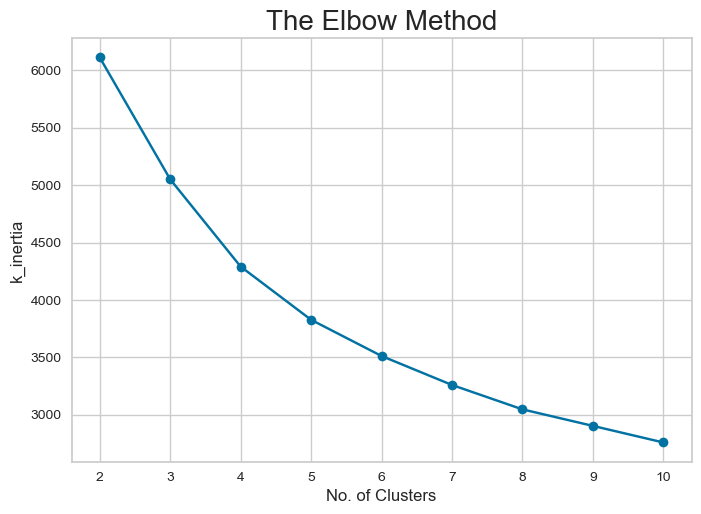

In [37]:
k_inertia = []
#membuat iterasi dari 2-10 untuk nilai k terbaik
for i in range(2, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
    km.fit(data_reduce)
    k_inertia.append(km.inertia_)
    
plt.plot(range(2, 11), k_inertia, marker ="o")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('k_inertia')
plt.show()

menurut `Elbow Method` jumlah clustering yang direkomendasikan berjumlah 5 sampai 6 cluster
 

#### Silhouette Method

In [38]:
sil_df = data_reduce.copy()

In [39]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
km.fit(data_reduce)

#calculate the score
score = silhouette_score(sil_df, km.labels_, metric='euclidean')
print('Silhouette score: %.3f' % score)

Silhouette score: 0.223


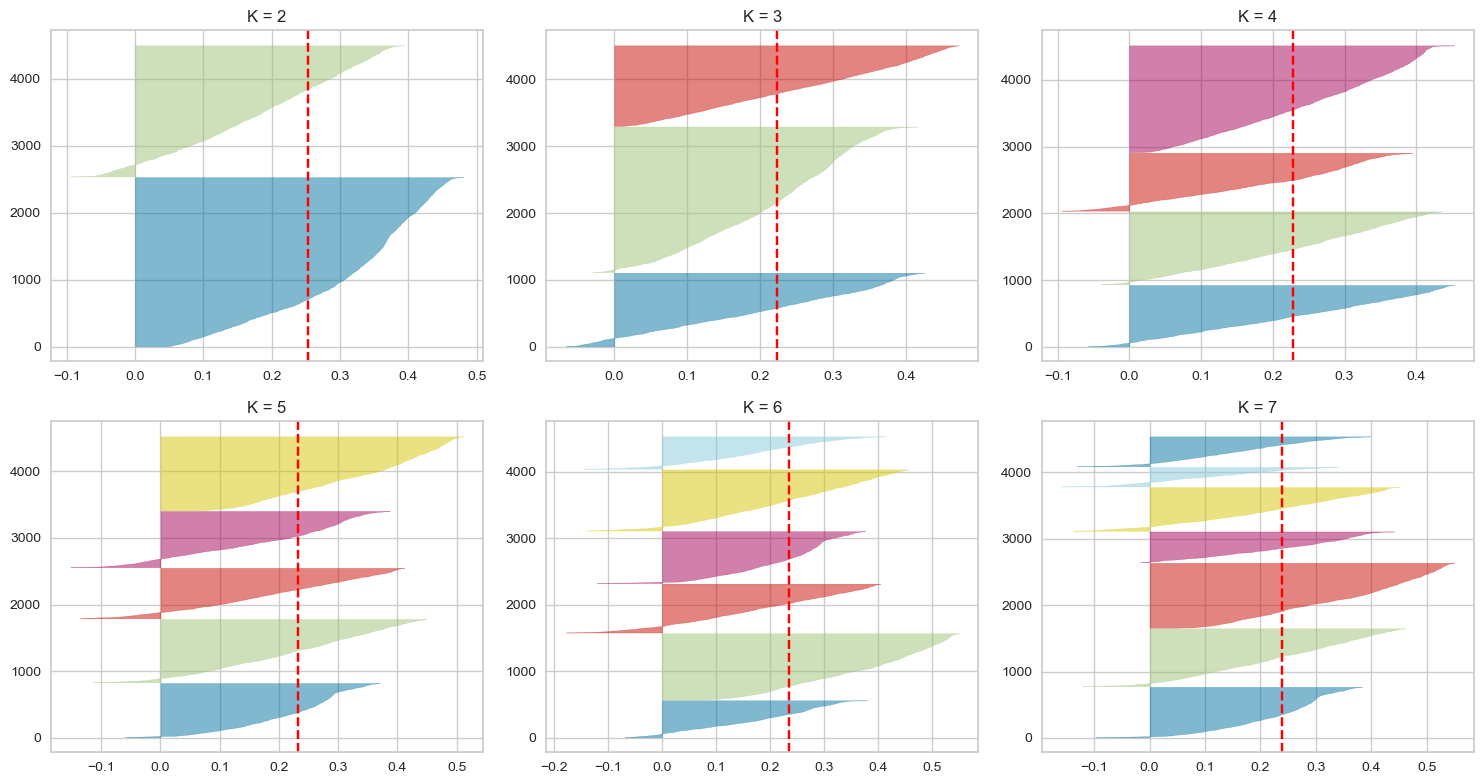

In [40]:
# Set up subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Loop melalui setiap subplot
for i, ax in enumerate(axes.flatten()):
    
    # Set jumlah cluster
    n_clusters = i + 2
    
    # Initialize K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init = 10, max_iter = 300, random_state = 3)

    # Buat SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)
    
    # Fit visualizer ke data x
    visualizer.fit(data_reduce)
    
    # Set title
    ax.set_title(f'K = {n_clusters}')
    
# Adjust layout
plt.tight_layout()
plt.show()

berdasarkan visualisasi jumlah cluster yang didapat berjumlah 4 cluster dan menghasilkan Silhouette score: `0.223` 

# 9. Model Evaluation

In [41]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
y_pred = km.fit_predict(data_reduce)
y_pred

array([0, 0, 4, ..., 2, 2, 2])

In [42]:
km.n_iter_

15

In [43]:
data_clean['cluster'] = list(y_pred)
data_clean.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,0.000777,0.00,0.016687,0.031292,0.0,0.0,0.125,0.2,0.0,0.0,0.0,0.024390,0.032609,0.000000,0.183691,0.0,0.333333,0
1,0.000000,0.00,0.065276,0.122409,0.0,0.0,0.125,0.2,0.0,0.0,0.0,0.024390,0.503623,0.000000,0.183691,0.0,0.333333,0
2,0.153674,0.55,0.058367,0.109454,0.0,0.0,0.125,0.2,0.0,0.0,0.0,0.146341,0.083333,0.354678,1.000000,0.0,0.333333,4
3,0.053640,0.00,0.426446,0.799694,0.0,0.0,0.125,0.2,0.0,0.0,0.0,0.024390,0.083333,0.718949,0.049971,0.0,0.333333,0
4,0.089333,1.00,0.222493,0.417232,0.0,0.0,0.125,0.2,0.0,0.0,0.0,0.024390,0.068841,0.051100,0.080639,0.0,0.333333,4


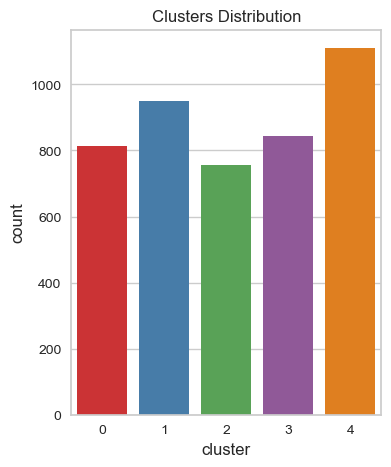

In [44]:
plt.figure(figsize=(4,5))

sns.countplot(data=data_clean, x='cluster' , palette='Set1')
plt.title('Clusters Distribution')
plt.show()

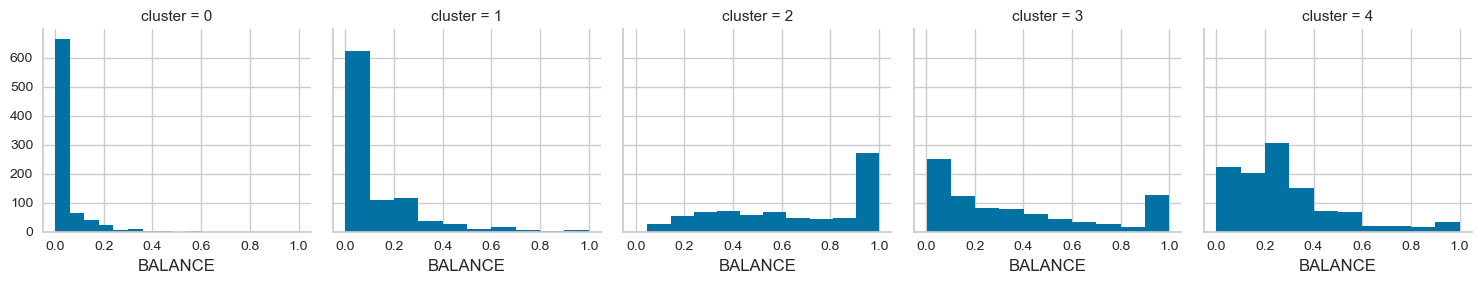

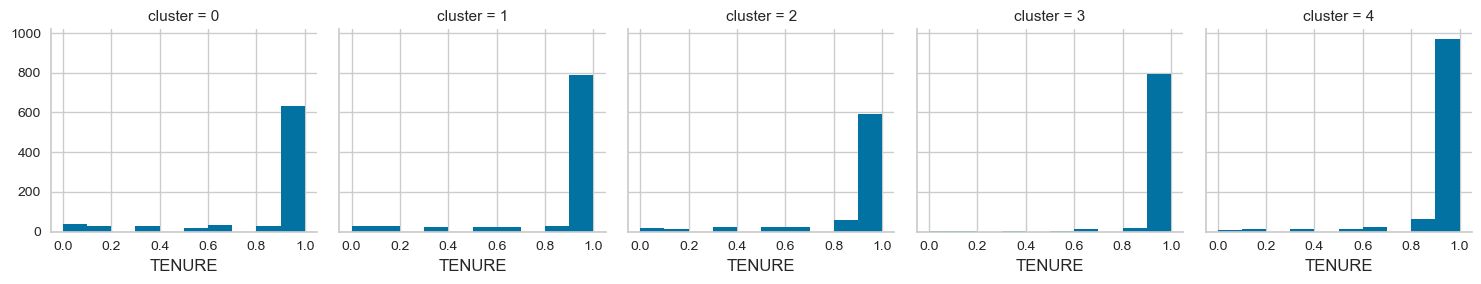

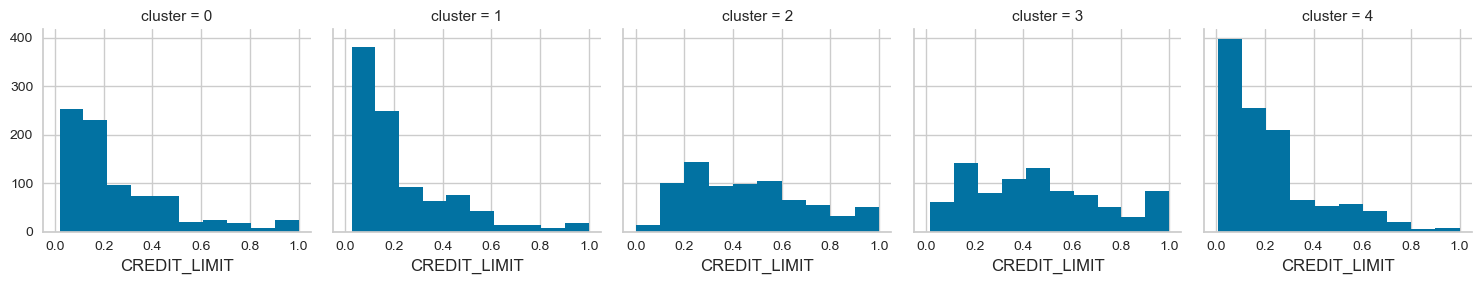

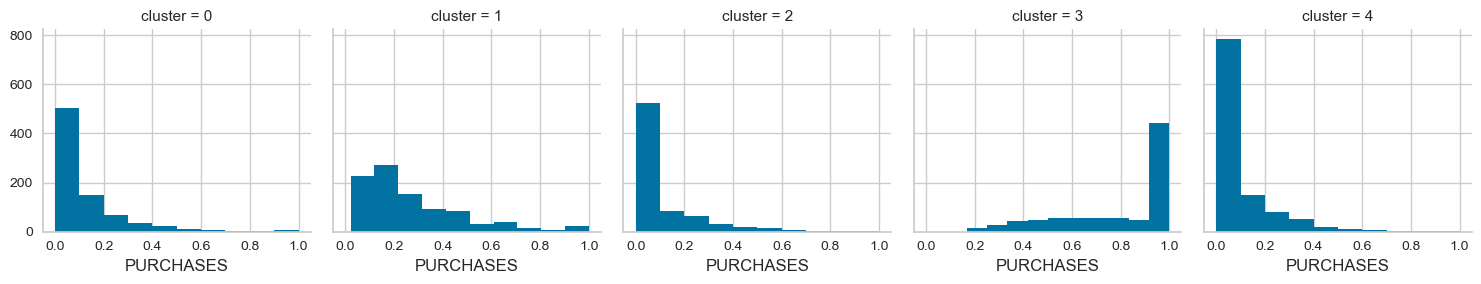

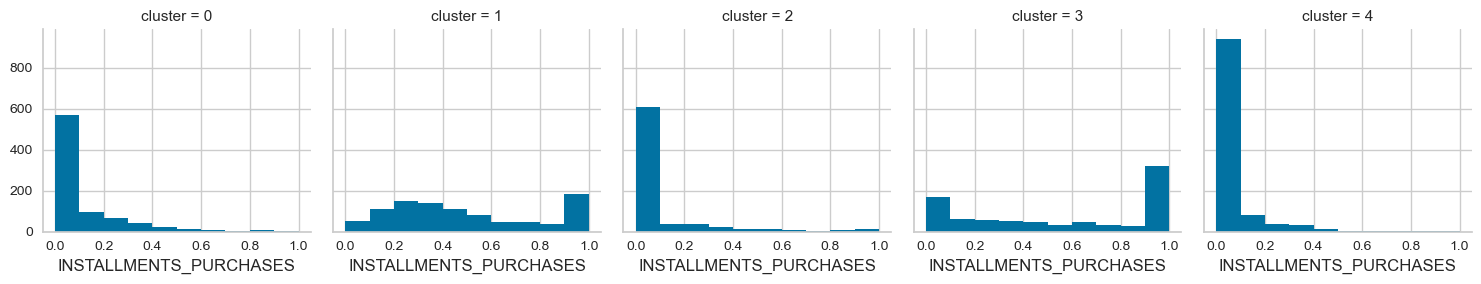

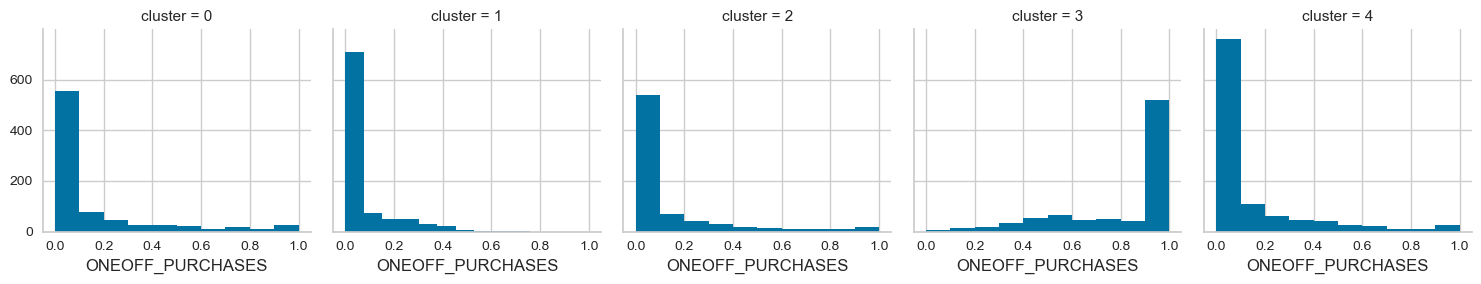

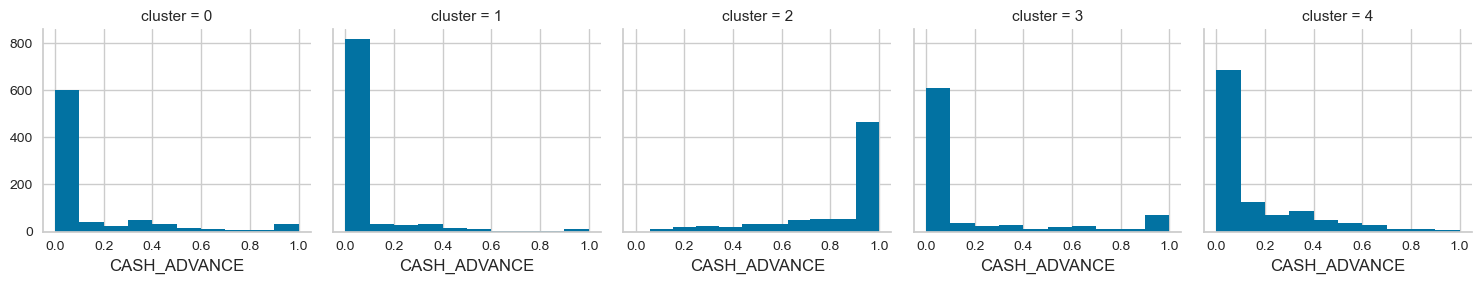

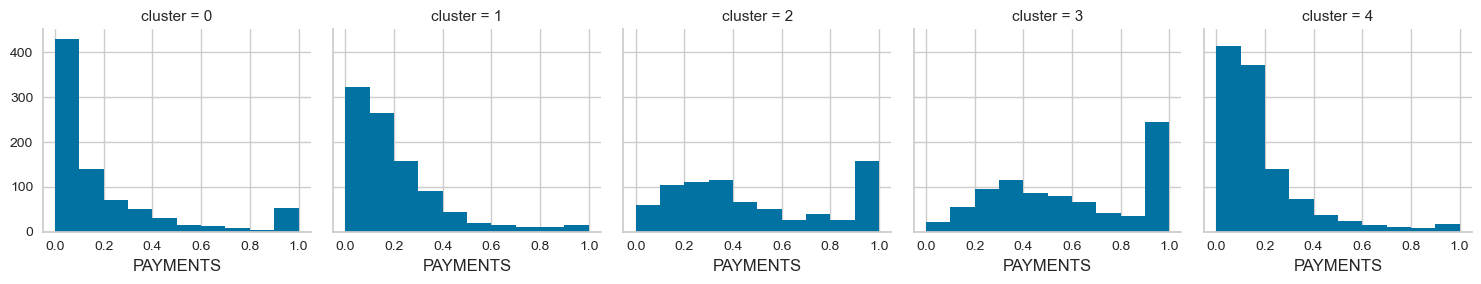

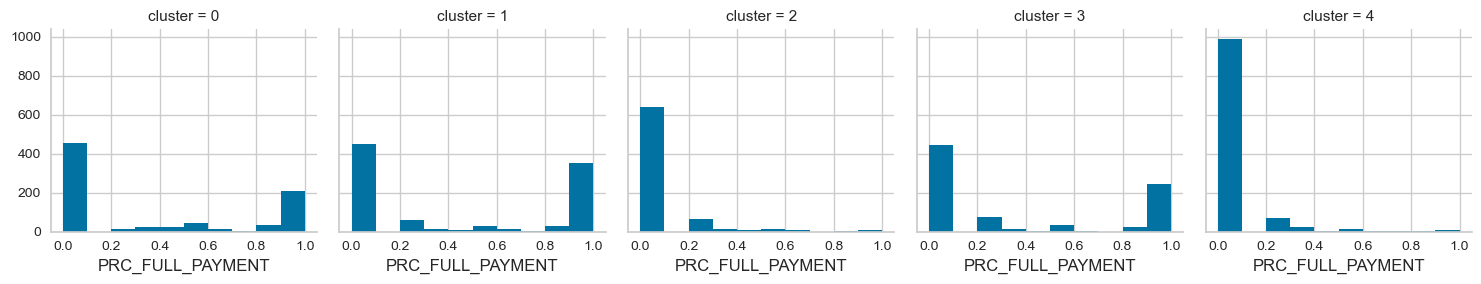

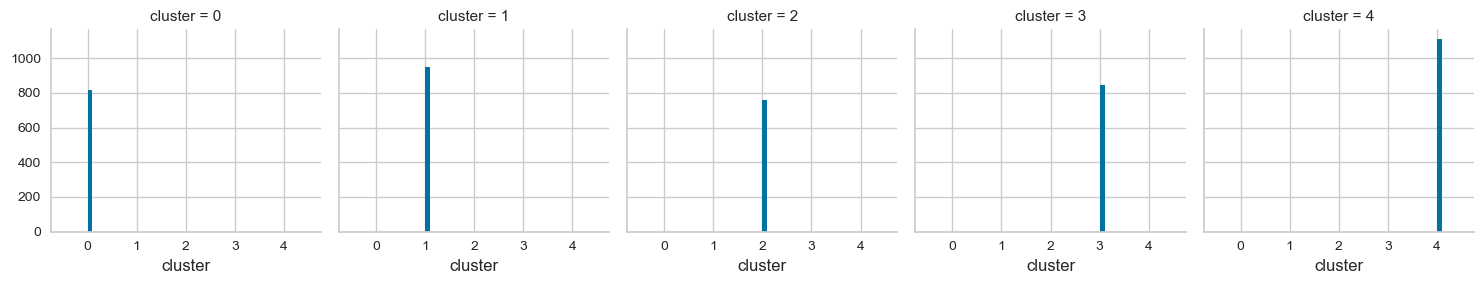

In [45]:
for c in data_clean[['BALANCE', 'TENURE', 'CREDIT_LIMIT', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 
                                  'ONEOFF_PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'PRC_FULL_PAYMENT', 'cluster']]:
    grid= sns.FacetGrid(data_clean, col='cluster')
    grid.map(plt.hist, c)

In [46]:
X = data_clean.copy()

In [47]:
dist = 1 - cosine_similarity(X)

pca2= PCA(2)
pca2.fit(dist)
X_pca2=pca2.transform(dist)
X_pca2.shape


(4475, 2)

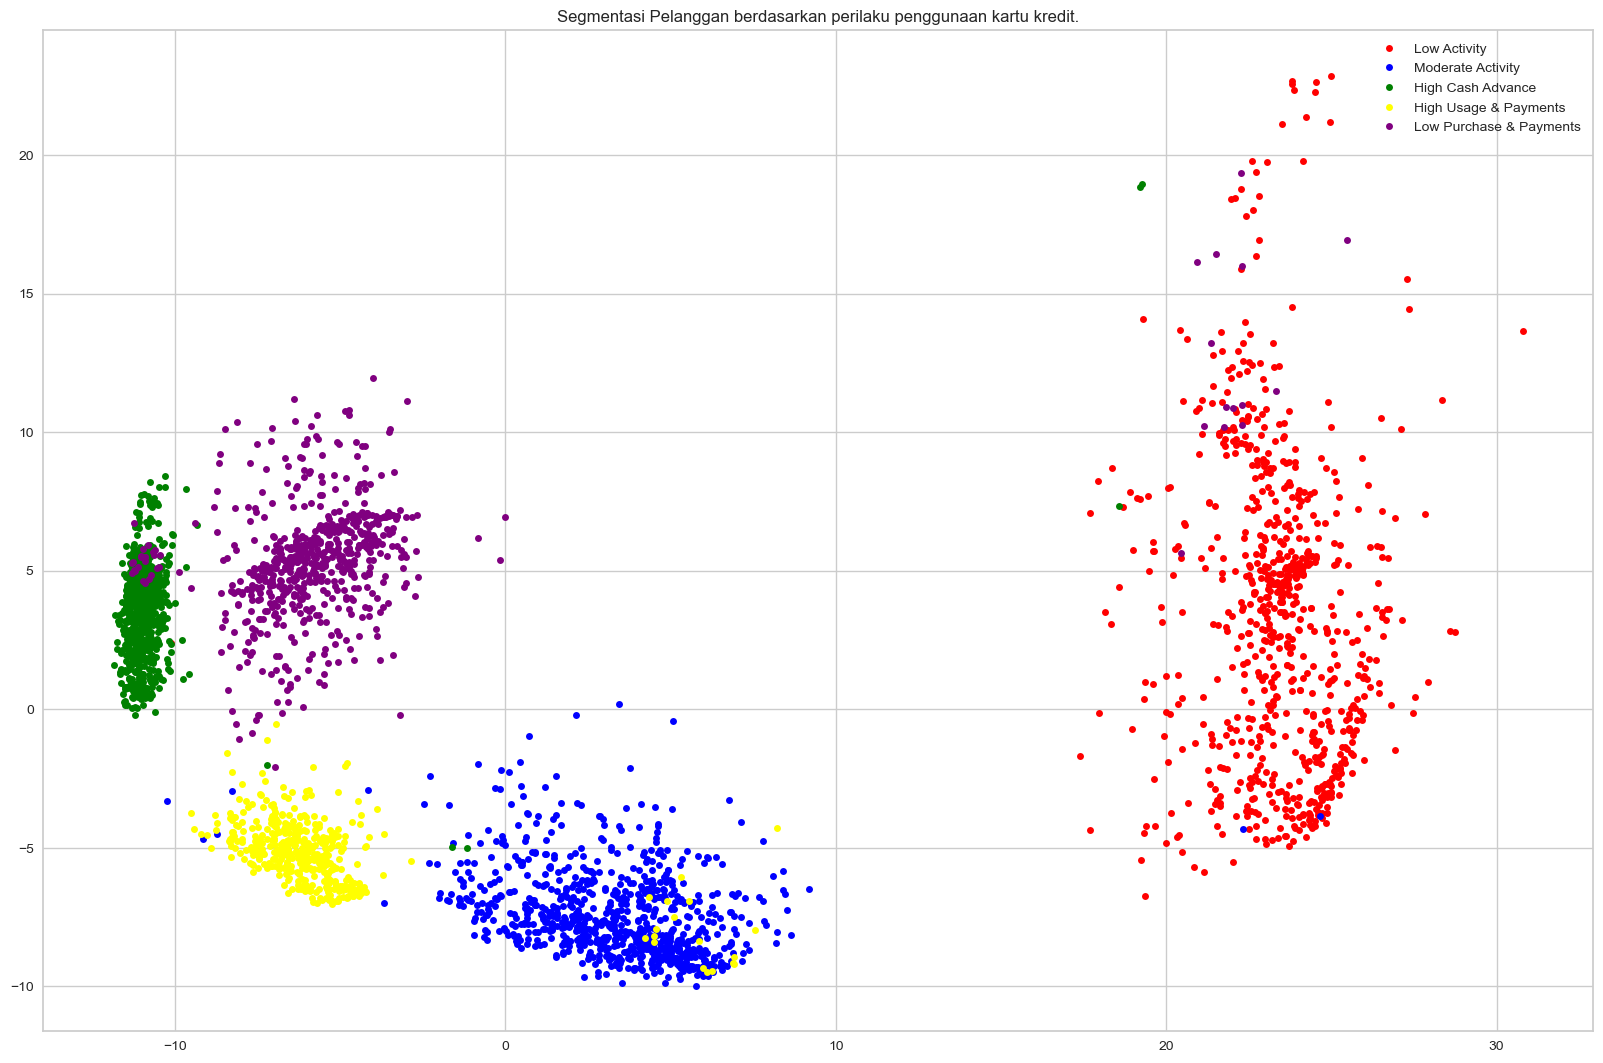

In [58]:
# Mengambil nilai x dan y dari hasil reduksi PCA
x, y = X_pca2[:, 0], X_pca2[:, 1]

# Membuat mapping warna berdasarkan nomor klaster
colors = {0: 'red', 1: 'blue', 2: 'green', 3:'yellow' , 4:'purple'}

# Membuat mapping nama klaster
names = {0: 'Low Activity', 1: 'Moderate Activity', 2: 'High Cash Advance', 3:'High Usage & Payments' , 4:'Low Purchase & Payments'}

# Membuat DataFrame dengan kolom x, y, dan klaster
daata = pd.DataFrame({'x': x, 'y': y, 'clusters': kmeans.labels_})

# Mengelompokkan data berdasarkan klaster
groups = daata.groupby('clusters')

# Membuat figure dan axis
fig, ax = plt.subplots(figsize=(20, 13))

# Melakukan iterasi untuk setiap klaster
for name, group in groups:
    # Pengecekan apakah label klaster ada dalam dictionary colors dan names
    if name in colors and name in names:
        # Plot titik pada scatter plot untuk setiap data dalam klaster
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
                color=colors[name], label=names[name], mec='none')
        ax.set_aspect('auto')
        ax.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
        ax.tick_params(axis='y', which='both', left='off', top='off', labelleft='off')

# Menampilkan legenda dan judul pada plot
ax.legend()
ax.set_title("Segmentasi Pelanggan berdasarkan perilaku penggunaan kartu kredit.")

# Menampilkan plot
plt.show()

In [49]:
data['cluster'] = list(y_pred)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,3.833185,0.722223,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,313.980229,0.0,8,0
1,0.000000,0.722223,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,313.980229,0.0,8,0
2,757.964752,0.875000,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,1709.197330,0.0,8,4
3,264.566591,0.722223,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8,0
4,440.613643,1.000000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8,4


In [50]:
data.groupby(by = 'cluster').mean().sort_values(by='BALANCE')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,187.966420,0.733942,323.206855,199.995663,104.410617,354.685474,0.251812,0.090476,0.149130,0.054008,0.941032,3.916462,3699.689524,855.135275,180.648882,0.111197,11.191646
1,565.987525,0.957898,751.665468,95.042324,569.142326,157.537991,0.907763,0.071961,0.844865,0.035549,0.619348,16.749737,3272.797109,882.704238,396.716945,0.139095,11.396425
4,1383.297716,0.991722,244.359171,184.371613,50.548912,416.846783,0.184190,0.101930,0.078350,0.106396,1.748649,3.161261,3148.918919,784.602101,545.722896,0.012744,11.700901
3,1820.500912,0.982327,2173.369193,1187.676643,645.154914,477.215957,0.906657,0.523349,0.619668,0.086288,1.626335,31.405694,6437.544484,2521.957226,658.385146,0.115173,11.849348
2,3255.211502,0.967892,266.731929,162.383606,89.224234,2380.686178,0.209143,0.088475,0.124416,0.415040,7.977543,4.219287,6286.267563,2060.573149,1079.606885,0.020430,11.385733


Cluster 0:

Memiliki rata-rata Balance, Balance Frequency, dan jumlah Purchases yang rendah.
Frekuensi Pembelian (Purchases Frequency) dan frekuensi pembelian One-off (Oneoff Purchases Frequency) juga rendah.
Cenderung memiliki jumlah Cash Advance yang cukup tinggi.
Rata-rata jumlah Minimum Payments dan persentase pembayaran penuh (PRC_FULL_PAYMENT) rendah.
Tenure (jangka waktu kepemilikan kartu) cenderung rendah.

Cluster 1:

Memiliki rata-rata Balance, Balance Frequency, dan jumlah Purchases yang sedang.
Memiliki frekuensi pembelian (Purchases Frequency) dan frekuensi pembelian Installments (Purchases Installments Frequency) yang tinggi.
Cenderung memiliki jumlah Cash Advance yang rendah.
Rata-rata jumlah Payments dan persentase pembayaran penuh (PRC_FULL_PAYMENT) sedang.
Tenure (jangka waktu kepemilikan kartu) cenderung sedang.

Cluster 2:

Memiliki rata-rata Balance dan Balance Frequency yang tinggi.
Rata-rata jumlah Cash Advance sangat tinggi.
Memiliki frekuensi pembelian Cash Advance yang tinggi.
Memiliki rata-rata jumlah Payments dan jumlah Minimum Payments yang tinggi.
Persentase pembayaran penuh (PRC_FULL_PAYMENT) rendah.
Tenure (jangka waktu kepemilikan kartu) cenderung sedang.

Cluster 3:

Memiliki rata-rata Balance, Balance Frequency, dan jumlah Purchases yang sedang.
Frekuensi Pembelian (Purchases Frequency) dan frekuensi pembelian One-off (Oneoff Purchases Frequency) juga tinggi.
Cenderung memiliki jumlah Cash Advance yang tinggi.
Rata-rata jumlah Payments, jumlah Minimum Payments, dan persentase pembayaran penuh (PRC_FULL_PAYMENT) tinggi.
Tenure (jangka waktu kepemilikan kartu) cenderung tinggi.

Cluster 4:

Memiliki rata-rata Balance dan Balance Frequency yang sedang.
Jumlah Pembelian (Purchases), jumlah One-off Purchases, dan jumlah Installments Purchases cenderung rendah.
Frekuensi Pembelian (Purchases Frequency), frekuensi pembelian One-off (Oneoff Purchases Frequency), dan frekuensi pembelian Installments (Purchases Installments Frequency) juga rendah.
Rata-rata jumlah Cash Advance rendah.
Rata-rata jumlah Minimum Payments tinggi.
Persentase pembayaran penuh (PRC_FULL_PAYMENT) rendah.
Tenure (jangka waktu kepemilikan kartu) cenderung tinggi.

# 10. Model Saving

In [51]:
with open ('pca.pkl', 'wb') as file_1:
    pickle.dump(pca10, file_1)
with open ('kmeans.pkl', 'wb') as file_2:
    pickle.dump(km,file_2)

with open ('winsoriser.pkl', 'wb') as file_3:
    pickle.dump(winsoriser,file_3)
with open ('scaler.pkl','wb') as file_4:
    pickle.dump(scaler,file_4)

# Pertanyaan

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

## Jawaban

1. Inertia mengukur sejauh mana titik-titik data dalam satu kelompok atau cluster mirip satu sama lain.
2. Metode Elbow (Elbow Method) adalah salah satu metode yang digunakan untuk menentukan jumlah optimal cluster dalam algoritma K-Means. Tujuan utama dari metode ini adalah mencari titik "siku" (elbow) pada kurva jumlah cluster versus inertia yang dihasilkan oleh K-Means.

* Alasan Penggunaan:
Metode Elbow digunakan karena ingin mencari jumlah cluster yang optimal untuk pengelompokan data. Dengan menentukan jumlah cluster yang tepat, kita dapat menghindari pengelompokan yang terlalu kasar atau terlalu halus.

* Cara Penggunaan: 
 1. Menjalankan algoritma K-Means dengan berbagai jumlah cluster (misalnya dari 1 hingga k).
 2. Menghitung inertia (misalnya dengan menggunakan metrik jarak Euclidean) untuk setiap jumlah cluster.
 3. Memplot jumlah cluster versus inertia dalam sebuah grafik. 
 4. Mencari titik "siku" (elbow) pada kurva. Titik ini menunjukkan jumlah cluster di mana penurunan inertia mulai melambat secara signifikan.
 5. Menentukan jumlah cluster optimal berdasarkan titik "siku" tersebut.

 * Kelebihan:

Metode Elbow sederhana dan mudah dipahami.
Memberikan petunjuk kasar dalam menentukan jumlah cluster yang optimal.

* Kelemahan:

Metode Elbow dapat menjadi subjektif dalam menentukan titik "siku" pada kurva. Terkadang tidak jelas di mana letak titik tersebut.